In [22]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Load the dataset
df = pd.read_csv('cleaned_data.csv')

In [24]:
df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,284582,12,2,3,5,4,0,0,0,40,38,<=50K
6,49,2,160187,6,3,7,1,2,0,0,0,16,22,<=50K
7,52,4,209642,11,2,3,0,4,1,0,0,45,38,>50K
8,31,2,45781,12,4,9,1,4,0,14084,0,50,38,>50K
9,42,2,159449,9,2,3,0,4,1,5178,0,40,38,>50K


## Standard Scaler

In [25]:
X = df.drop(['income'], axis=1) # Features
y = df['income'] # Label

In [26]:
scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [27]:
X_scaler.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.033585,2.91625,-1.062200,-0.344032,0.943267,-1.482668,-0.258452,0.384230,0.693823,0.142663,-0.218899,-0.078493,0.262722
1,0.865959,1.87300,-1.007350,-0.344032,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.146811,-0.218899,-2.327069,0.262722
2,-0.042086,-0.21350,0.245214,0.179935,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.146811,-0.218899,-0.078493,0.262722
3,1.092971,-0.21350,0.425761,-2.439903,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.146811,-0.218899,-0.078493,0.262722
4,-0.798790,-0.21350,1.407179,-0.344032,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.146811,-0.218899,-0.078493,-5.330650
5,-0.117756,-0.21350,0.897701,0.441919,-0.389548,-0.737662,2.245285,0.384230,-1.441290,-0.146811,-0.218899,-0.078493,0.262722
6,0.790289,-0.21350,-0.279711,-1.129984,0.276860,0.255680,-0.258452,-2.018206,-1.441290,-0.146811,-0.218899,-2.077228,-2.369453
7,1.017300,1.87300,0.188386,0.179935,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.146811,-0.218899,0.337910,0.262722
8,-0.571779,-0.21350,-1.362575,0.441919,0.943267,0.752350,-0.258452,0.384230,-1.441290,1.728513,-0.218899,0.754313,0.262722
9,0.260596,-0.21350,-0.286696,-0.344032,-0.389548,-0.737662,-0.884386,0.384230,0.693823,0.542654,-0.218899,-0.078493,0.262722


In [28]:
# Calculate the standard deviation of all columns
std_X = X_scaler.std()
print('Standard Deviation after Performing Standard Scaler: \n',std_X)

Standard Deviation after Performing Standard Scaler: 
 age               1.000011
workclass         1.000011
fnlwgt            1.000011
education         1.000011
marital-status    1.000011
occupation        1.000011
relationship      1.000011
race              1.000011
sex               1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
native-country    1.000011
dtype: float64


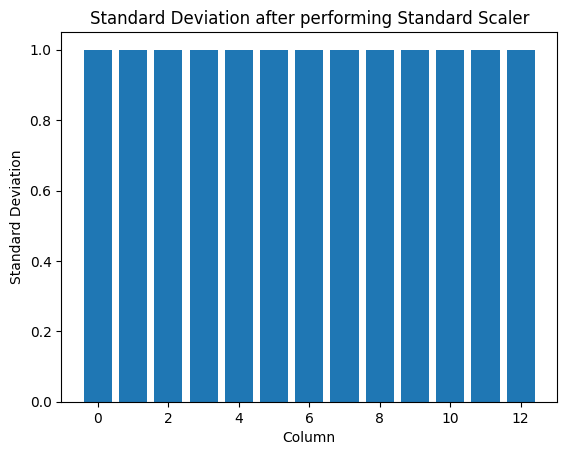

In [29]:
# Plot the Standard Deviation of all columns
plt.bar(range(len(std_X)), std_X)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Standard Deviation")
plt.show()

In [30]:
# Calculate the mean of all columns
mean_X = X_scaler.mean()
print('Mean after Performing Standard Scaler: \n',mean_X)

Mean after Performing Standard Scaler: 
 age               1.509952e-17
workclass         1.170213e-16
fnlwgt           -1.410862e-16
education         1.242565e-16
marital-status    1.038092e-17
occupation        5.662322e-17
relationship      6.291469e-19
race             -9.122629e-17
sex              -8.996800e-17
capital-gain     -5.347748e-18
capital-loss      1.132464e-17
hours-per-week   -9.201273e-17
native-country    9.122629e-17
dtype: float64


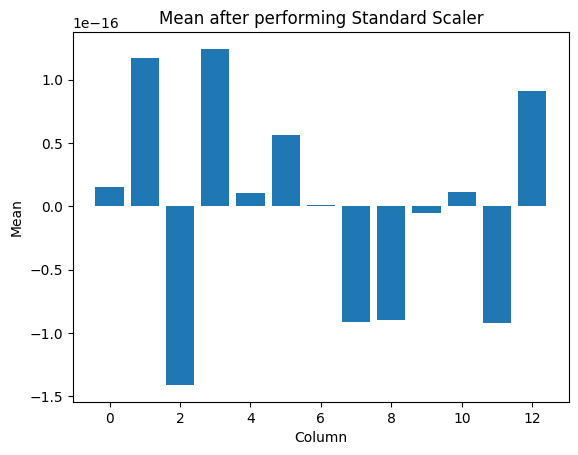

In [31]:
# Plot the Mean of all columns
plt.bar(range(len(mean_X)), mean_X)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Mean")
plt.show()

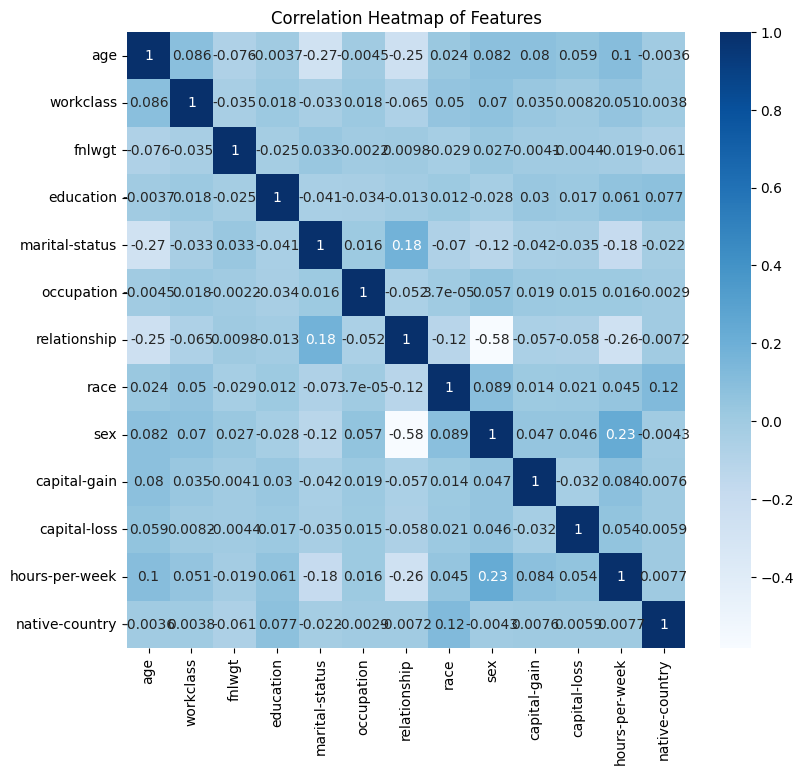

In [32]:

#Plot correlation heatmap
plt.figure(figsize = (9,8))
plt.title("Correlation Heatmap of Features")
sns.heatmap(X_scaler.corr(), cmap = 'Blues', annot = True)
plt.show()

## Principal Component Analysis(PCA)

In [33]:
# Instantiate PCA
pca = PCA()

In [34]:
# Fit and transform the data
X_pca = pca.fit_transform(X_scaler)

In [35]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display attribute names and their contributions to explained variance
df_components = pd.DataFrame({'Attribute': X_scaler.columns, 'Explained Variance Ratio': explained_variance})

print("Explained Variance Ratio for Each Attribute:\n")
print(df_components)

Explained Variance Ratio for Each Attribute:

         Attribute  Explained Variance Ratio
0              age                  0.156718
1        workclass                  0.092699
2           fnlwgt                  0.086021
3        education                  0.079877
4   marital-status                  0.079490
5       occupation                  0.076466
6     relationship                  0.074478
7             race                  0.072817
8              sex                  0.069871
9     capital-gain                  0.065003
10    capital-loss                  0.063605
11  hours-per-week                  0.053027
12  native-country                  0.029927


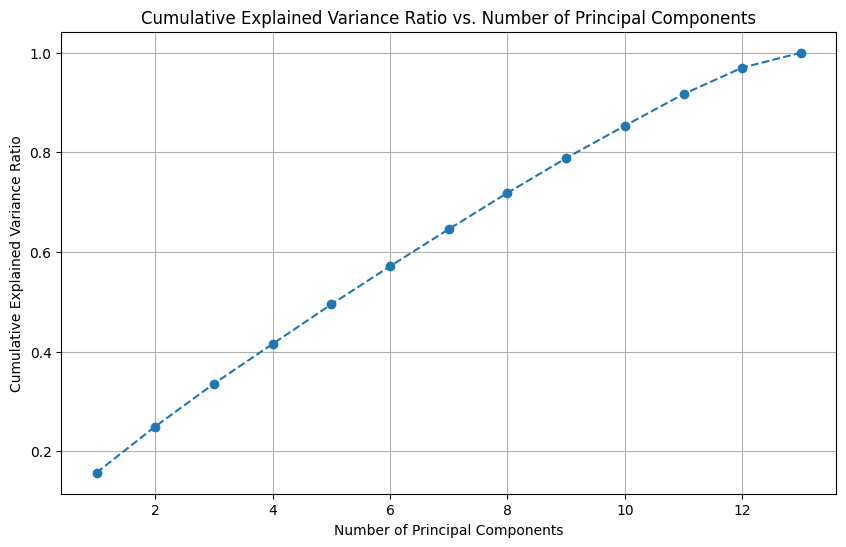

In [36]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [37]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaler)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.585612,-0.708951,-0.394252,0.723986,-1.186807,-0.706480,-2.813949,-0.829748,1.108792,-0.571561
1,0.666157,-0.794009,0.128526,-0.026741,-1.777371,-1.184097,-1.460062,-0.316101,0.109311,-1.100819
2,1.003859,-0.362138,0.025417,-0.306432,0.475741,-0.694615,0.313164,0.254932,-0.710069,0.140799
3,0.759383,1.577882,1.518623,-0.400051,-0.745707,-1.069425,0.678210,-0.063624,0.217335,-2.149402
4,-2.779713,3.008856,3.935919,0.275650,0.486809,1.121522,-0.688891,0.225540,-0.897165,2.750224


In [38]:
# Concatenate the target variable
df = pd.concat([X_pca, y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,income
0,0.585612,-0.708951,-0.394252,0.723986,-1.186807,-0.706480,-2.813949,-0.829748,1.108792,-0.571561,<=50K
1,0.666157,-0.794009,0.128526,-0.026741,-1.777371,-1.184097,-1.460062,-0.316101,0.109311,-1.100819,<=50K
2,1.003859,-0.362138,0.025417,-0.306432,0.475741,-0.694615,0.313164,0.254932,-0.710069,0.140799,<=50K
3,0.759383,1.577882,1.518623,-0.400051,-0.745707,-1.069425,0.678210,-0.063624,0.217335,-2.149402,<=50K
4,-2.779713,3.008856,3.935919,0.275650,0.486809,1.121522,-0.688891,0.225540,-0.897165,2.750224,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.681700,0.751477,-1.030481,0.305656,-0.299048,0.124597,0.217525,0.336430,-0.139284,0.029686,<=50K
45171,-0.116587,-0.705684,0.475827,-0.218210,-0.481450,-0.313812,0.887871,0.937572,-1.190945,0.390470,<=50K
45172,1.184104,1.208535,-0.671675,0.111181,0.515599,-0.186505,0.294378,1.028036,-0.995539,-0.109039,<=50K
45173,-0.093358,-0.510354,2.643852,-0.001629,0.795131,-0.238701,0.455583,-1.334452,0.532926,-1.911656,<=50K


In [39]:
# Save the data
df.to_csv('cleaned_labelEncoded_PCA_adult.csv', index=False)